<a href="https://colab.research.google.com/github/nyayuchika/pcd-coursework/blob/master/PCD_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Input citra

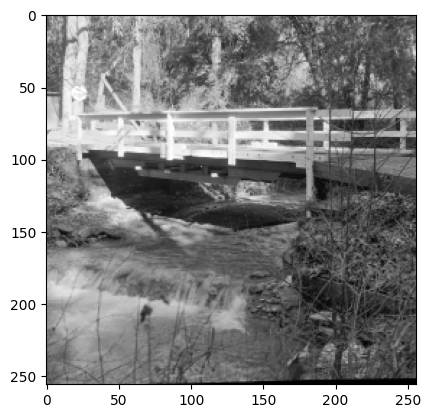

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('bridge.png',0)
plt.imshow(img, cmap='gray')

In [3]:
print(img.shape)

(256, 256)


In [4]:
print(img)

[[ 94  96 113 ... 145 139 107]
 [ 91 125 120 ...  92 105 110]
 [ 87 119 144 ...  87 101 102]
 ...
 [101  98  81 ...   0   0   0]
 [115 110  88 ...   0   0   0]
 [101 107  99 ...   0   0   0]]


Fungsi konvolusi



In [5]:
def konvolusi(image, kernel):
  baris_img, kolom_img = image.shape
  baris_kernel, kolom_kernel = kernel.shape

  #kernel berupa matriks persegi dan harus ganjil
  baris_padding = int((baris_kernel - 1) / 2)
  kolom_padding = int((kolom_kernel - 1) / 2)

  baris_baru = baris_img + 2 * baris_padding
  kolom_baru = kolom_img + 2 * kolom_padding

  #bentuk matriks zero padding
  padding = []
  for i in range(baris_baru):
    membentuk_padding = []
    for j in range(kolom_baru):
      membentuk_padding.append(0)
    padding.append(membentuk_padding)

  #proses padding matriks dengan zero padding
  for i in range(baris_img):
    for j in range(kolom_img):
      padding[i+baris_padding][j+kolom_padding] = image[i][j]

  #proses konvolusi
  hasil_konvolusi = []
  for i in range(baris_img):
    membentuk_hasil_konvolusi = []
    for j in range(kolom_img):
      membentuk_hasil_konvolusi.append(0)
    hasil_konvolusi.append(membentuk_hasil_konvolusi)

  for y in range(baris_img):
    for x in range(kolom_img):
      total = 0
      for i in range(baris_kernel):
        for j in range(kolom_kernel):
          total += kernel[i][j] * padding[y+i][x+j]
      hasil_konvolusi[y][x] = total
  return hasil_konvolusi, padding

Spatial Filtering

In [15]:
#Kernel
import numpy as np
#identical image
identical_kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])
print(identical_kernel,'\n')

#shifted left by 1 pixel
shifted_kernel = np.array([[0, 0, 0],
                    [1, 0, 0],
                    [0, 0, 0]])
print(shifted_kernel,'\n')

#blur
blur_kernel = np.array([[1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9]])
print(blur_kernel,'\n')


# Sharpen kernel
sharpen_kernel = np.array([[[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]]])
print(sharpen_kernel,'\n')

# Edge detection (Sobel horizontal)
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]
])
print(sobel_x)

[[0 0 0]
 [0 1 0]
 [0 0 0]] 

[[0 0 0]
 [1 0 0]
 [0 0 0]] 

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]] 

[[[ 0 -1  0]
  [-1  5 -1]
  [ 0 -1  0]]] 

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


[[ 94  96 113 ... 145 139 107]
 [ 91 125 120 ...  92 105 110]
 [ 87 119 144 ...  87 101 102]
 ...
 [101  98  81 ...   0   0   0]
 [115 110  88 ...   0   0   0]
 [101 107  99 ...   0   0   0]] 


[[  0   0   0 ...   0   0   0]
 [  0  94  96 ... 139 107   0]
 [  0  91 125 ... 105 110   0]
 ...
 [  0 115 110 ...   0   0   0]
 [  0 101 107 ...   0   0   0]
 [  0   0   0 ...   0   0   0]] 




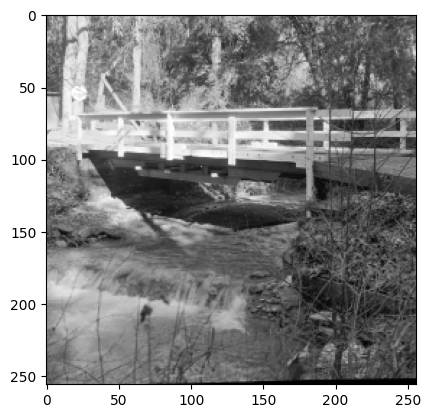

In [16]:
#Kernel Identical
identical_konvolusi, identical_padding = konvolusi(img, identical_kernel)
print(np.array(identical_konvolusi), '\n\n')
print(np.array(identical_padding),'\n\n')
plt.imshow(identical_konvolusi, cmap='gray')

[[  0  94  96 ... 134 145 139]
 [  0  91 125 ...  86  92 105]
 [  0  87 119 ...  91  87 101]
 ...
 [  0 101  98 ...   0   0   0]
 [  0 115 110 ...   0   0   0]
 [  0 101 107 ...   0   0   0]] 


[[  0   0   0 ...   0   0   0]
 [  0  94  96 ... 139 107   0]
 [  0  91 125 ... 105 110   0]
 ...
 [  0 115 110 ...   0   0   0]
 [  0 101 107 ...   0   0   0]
 [  0   0   0 ...   0   0   0]] 




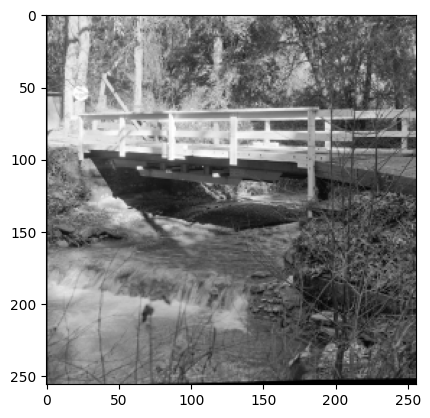

In [17]:
#Kernel Side by 1 Left
shifted_konvolusi, shifted_padding = konvolusi(img, shifted_kernel)
print(np.array(shifted_konvolusi), '\n\n')
print(np.array(shifted_padding),'\n\n')
plt.imshow(shifted_konvolusi, cmap='gray')

[[ 45.11111111  71.          82.44444444 ...  77.88888889  77.55555556
   51.22222222]
 [ 68.         109.88888889 125.22222222 ... 108.88888889 109.77777778
   73.77777778]
 [ 67.         112.         124.11111111 ...  98.77777778 103.55555556
   71.44444444]
 ...
 [ 66.88888889  94.44444444  89.44444444 ...   1.55555556   1.22222222
    0.77777778]
 [ 70.22222222 100.          95.55555556 ...   0.           0.
    0.        ]
 [ 48.11111111  68.88888889  65.88888889 ...   0.           0.
    0.        ]] 


[[  0   0   0 ...   0   0   0]
 [  0  94  96 ... 139 107   0]
 [  0  91 125 ... 105 110   0]
 ...
 [  0 115 110 ...   0   0   0]
 [  0 101 107 ...   0   0   0]
 [  0   0   0 ...   0   0   0]] 




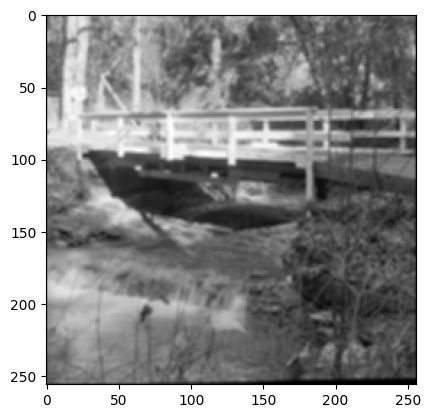

In [18]:
#Kernel Identical
blur_konvolusi, blur_padding = konvolusi(img, blur_kernel)
print(np.array(blur_konvolusi), '\n\n')
print(np.array(blur_padding),'\n\n')
plt.imshow(blur_konvolusi, cmap='gray')

[[ 317   67  106 ...   29  -58 -383]
 [ 465  134   98 ...   53   13 -450]
 [ 456  196   41 ...   62   43 -427]
 ...
 [ 385  -87  -27 ...   -4    0   -3]
 [ 425  -76  -54 ...    0    0    0]
 [ 324  -31  -40 ...    0    0    0]] 


[[  0   0   0 ...   0   0   0]
 [  0  94  96 ... 139 107   0]
 [  0  91 125 ... 105 110   0]
 ...
 [  0 115 110 ...   0   0   0]
 [  0 101 107 ...   0   0   0]
 [  0   0   0 ...   0   0   0]] 




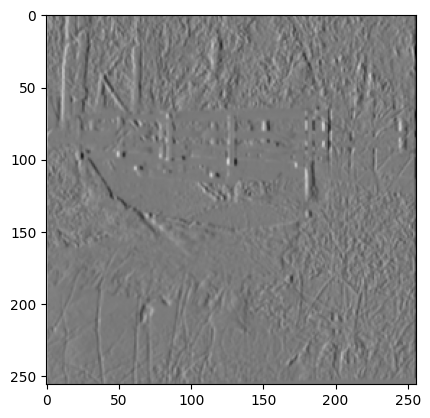

In [20]:
#Edge detection kernel

edge_konvolusi, edge_padding = konvolusi(img, sobel_x)
print(np.array(edge_konvolusi), '\n\n')
print(np.array(edge_padding),'\n\n')
plt.imshow(edge_konvolusi, cmap='gray')

Sharpened

In [21]:
baris_img, kolom_img = img.shape

In [23]:
print(baris_img)
print(kolom_img)

256
256


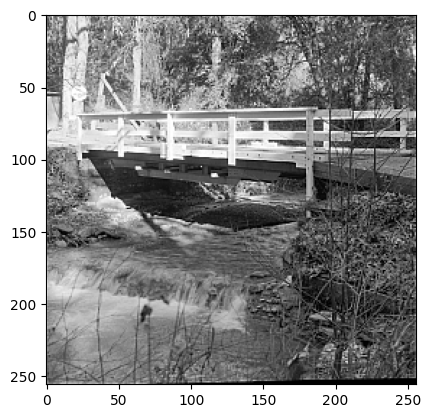

In [41]:
sharpened = []
for i in range(baris_img):
  membentuk_sharpened = []
  for j in range(kolom_img):
    operasi_sharpened = img[i][j] + (img[i][j] - blur_konvolusi[i][j])
    if operasi_sharpened < 0:
      operasi_sharpened = 0
    elif operasi_sharpened > 255:
      operasi_sharpened = 255
    membentuk_sharpened.append(operasi_sharpened)
  sharpened.append(membentuk_sharpened)

plt.imshow(sharpened, cmap='gray')

Discussion

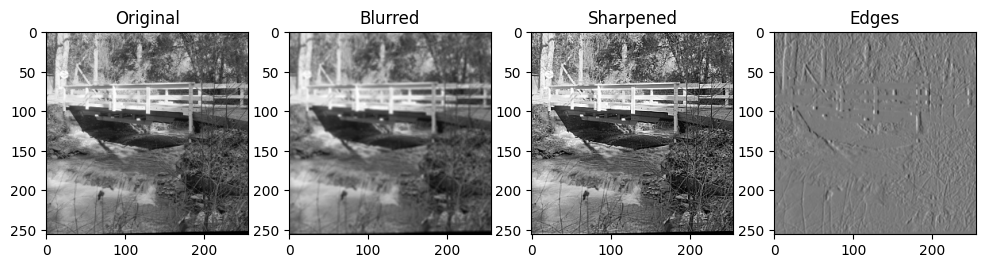

In [42]:
plt.figure(figsize=(12,6))

plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title("Original")

plt.subplot(1,4,2)
plt.imshow(blur_konvolusi, cmap='gray')
plt.title("Blurred")

plt.subplot(1,4,3)
plt.imshow(sharpened, cmap='gray')
plt.title("Sharpened")

plt.subplot(1,4,4)
plt.imshow(edge_konvolusi, cmap='gray')
plt.title("Edges")

plt.show()
